>>logistic regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


*without shuffeeling data,unbalanced

In [ ]:

# Load CSV
df = pd.read_csv("Code_Comment_Seed_Data.csv")

# Create a combined text column
df["text"] = df["Comments"].astype(str) + " " + df["Surrounding Code Context"].astype(str)

# Take a random sample of 1000 rows (to mix both classes)
df_sample = df.sample(n=df.shape[0], random_state=42)

# Features and labels
X = df_sample["text"]   # use the combined column
y = df_sample["Class"]
print(df_sample["Class"].value_counts())
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))


Class
Useful        7063
Not Useful    4389
Name: count, dtype: int64
              precision    recall  f1-score   support

  Not Useful       0.80      0.66      0.73      1097
      Useful       0.81      0.90      0.85      1766

    accuracy                           0.81      2863
   macro avg       0.81      0.78      0.79      2863
weighted avg       0.81      0.81      0.80      2863



without shuffeling , balanced

In [78]:


# Load CSV
df = pd.read_csv("Code_Comment_Seed_Data.csv")

# Create a combined text column
df["text"] = df["Comments"].astype(str) + " " + df["Surrounding Code Context"].astype(str)

# Take a random sample of 1000 rows (to mix both classes)
df_sample = df.sample(n=df.shape[0], random_state=42)

# Features and labels
X = df_sample["text"]   # use the combined column
y = df_sample["Class"]
print(df_sample["Class"].value_counts())
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000,class_weight="balanced")
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))


Class
Useful        7063
Not Useful    4389
Name: count, dtype: int64
              precision    recall  f1-score   support

  Not Useful       0.71      0.79      0.75      1097
      Useful       0.86      0.80      0.83      1766

    accuracy                           0.80      2863
   macro avg       0.79      0.80      0.79      2863
weighted avg       0.80      0.80      0.80      2863



with diffrent thresshold


Class distribution:
 Class
Useful        7063
Not Useful    4389
Name: count, dtype: int64

--- Evaluation with default threshold (0.5) ---
              precision    recall  f1-score   support

  Not Useful       0.71      0.79      0.75      1097
      Useful       0.86      0.80      0.83      1766

    accuracy                           0.80      2863
   macro avg       0.79      0.80      0.79      2863
weighted avg       0.80      0.80      0.80      2863

Confusion Matrix:
 [[ 872  225]
 [ 357 1409]]

--- Threshold sweep (manual list) ---

Threshold = 0.30
              precision    recall  f1-score   support

  Not Useful       0.89      0.53      0.66      1097
      Useful       0.77      0.96      0.85      1766

    accuracy                           0.79      2863
   macro avg       0.83      0.74      0.76      2863
weighted avg       0.81      0.79      0.78      2863

Confusion Matrix:
 [[ 579  518]
 [  71 1695]]

Threshold = 0.40
              precision    recall  f1-s

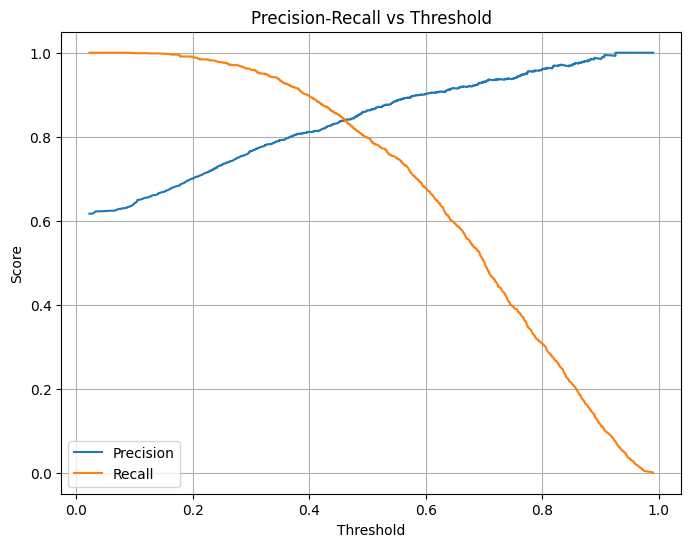

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Code_Comment_Seed_Data.csv")

# Create a combined text column
df["text"] = df["Comments"].astype(str) + " " + df["Surrounding Code Context"].astype(str)

# Shuffle dataset
df_sample = df.sample(n=df.shape[0], random_state=42)

# Features and labels
X = df_sample["text"]
y = df_sample["Class"]
print("Class distribution:\n", df_sample["Class"].value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train_tfidf, y_train)

# --- Default threshold (0.5) ---
y_pred_default = model.predict(X_test_tfidf)
print("\n--- Evaluation with default threshold (0.5) ---")
print(classification_report(y_test, y_pred_default))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default, labels=model.classes_))

# Probabilities for "Useful" (class index 1)
y_proba = model.predict_proba(X_test_tfidf)[:, 1]

# Mapping from numeric to original labels
label_map = {0: model.classes_[0], 1: model.classes_[1]}

# --- Sweep thresholds (manual list) ---
print("\n--- Threshold sweep (manual list) ---")
for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
    y_pred_t = (y_proba >= t).astype(int)
    y_pred_labels = [label_map[i] for i in y_pred_t]

    print(f"\nThreshold = {t:.2f}")
    print(classification_report(y_test, y_pred_labels, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_labels, labels=model.classes_))

# --- Sweep thresholds (fine 0.05 steps) ---
print("\n--- Threshold sweep (fine 0.05 steps) ---")
for t in np.arange(0.3, 0.71, 0.05):
    y_pred_t = (y_proba >= t).astype(int)
    y_pred_labels = [label_map[i] for i in y_pred_t]

    print(f"\nThreshold = {t:.2f}")
    print(classification_report(y_test, y_pred_labels, zero_division=0))

# --- Precision-Recall curve to visualize threshold choice ---
precisions, recalls, thresholds = precision_recall_curve(y_test.map(lambda x: 1 if x == model.classes_[1] else 0), y_proba)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


WITH VALIDATION PART


Class distribution:
 Class
Useful        7063
Not Useful    4389
Name: count, dtype: int64
Train=6871, Val=2290, Test=2291

Best threshold from validation = 0.47 (Macro F1 = 0.783)

--- Final Test Evaluation ---
              precision    recall  f1-score   support

  Not Useful       0.72      0.72      0.72       878
      Useful       0.83      0.83      0.83      1413

    accuracy                           0.79      2291
   macro avg       0.77      0.77      0.77      2291
weighted avg       0.79      0.79      0.79      2291

Confusion Matrix:
 [[ 632  246]
 [ 245 1168]]


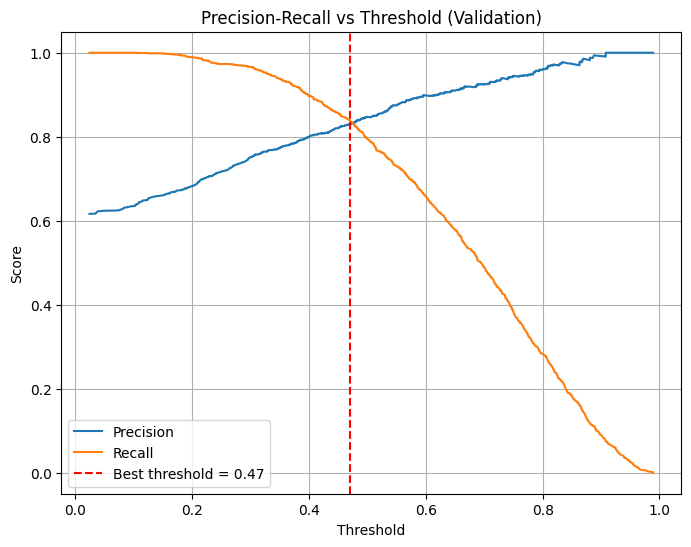

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Code_Comment_Seed_Data.csv")

# Create a combined text column
df["text"] = df["Comments"].astype(str) + " " + df["Surrounding Code Context"].astype(str)

# Shuffle dataset
df_sample = df.sample(n=df.shape[0], random_state=42)

# Features and labels
X = df_sample["text"]
y = df_sample["Class"]
print("Class distribution:\n", df_sample["Class"].value_counts())

# First split: train + temp (where temp will be validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)

# Second split: validation + test (20% + 20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print(f"Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}")

# TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train_tfidf, y_train)

# Probabilities for "Useful" (class index 1)
y_val_proba = model.predict_proba(X_val_tfidf)[:, 1]

# --- Find best threshold on VALIDATION ---
thresholds = np.arange(0.3, 0.71, 0.01)
best_t, best_f1 = 0.5, 0

for t in thresholds:
    y_val_pred = (y_val_proba >= t).astype(int)
    y_val_labels = [model.classes_[i] for i in y_val_pred]
    score = f1_score(y_val, y_val_labels, average="macro")
    if score > best_f1:
        best_f1, best_t = score, t

print(f"\nBest threshold from validation = {best_t:.2f} (Macro F1 = {best_f1:.3f})")

# --- Final evaluation on TEST using chosen threshold ---
y_test_proba = model.predict_proba(X_test_tfidf)[:, 1]
y_test_pred = (y_test_proba >= best_t).astype(int)
y_test_labels = [model.classes_[i] for i in y_test_pred]

print("\n--- Final Test Evaluation ---")
print(classification_report(y_test, y_test_labels, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_labels, labels=model.classes_))

# --- Precision-Recall curve (validation) ---
precisions, recalls, thresholds = precision_recall_curve(
    y_val.map(lambda x: 1 if x == model.classes_[1] else 0), y_val_proba
)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.axvline(best_t, color="red", linestyle="--", label=f"Best threshold = {best_t:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (Validation)")
plt.legend()
plt.grid(True)
plt.show()


balanced class data

Class distribution:
 Class
Useful        7063
Not Useful    4389
Name: count, dtype: int64
Balanced class distribution:
 Class
Not Useful    4389
Useful        4389
Name: count, dtype: int64
Train=5266, Val=1756, Test=1756

Best threshold from validation = 0.43 (Macro F1 = 0.781)

--- Final Test Evaluation ---
              precision    recall  f1-score   support

  Not Useful       0.81      0.69      0.74       878
      Useful       0.73      0.84      0.78       878

    accuracy                           0.76      1756
   macro avg       0.77      0.76      0.76      1756
weighted avg       0.77      0.76      0.76      1756

Confusion Matrix:
 [[604 274]
 [143 735]]


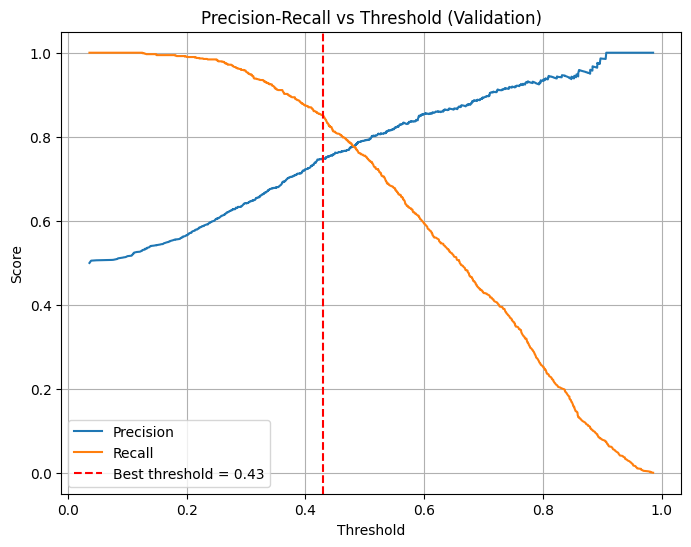

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Code_Comment_Seed_Data.csv")

# Create a combined text column
df["text"] = df["Comments"].astype(str) + " " + df["Surrounding Code Context"].astype(str)

# Shuffle dataset
df_sample = df.sample(n=df.shape[0], random_state=42)

# Features and labels
X = df_sample["text"]
y = df_sample["Class"]
print("Class distribution:\n", df_sample["Class"].value_counts())

# Balance dataset by downsampling Useful to match Not Useful count
count_not_useful = df_sample[df_sample["Class"] == "Not Useful"].shape[0]
df_balanced = pd.concat([
    df_sample[df_sample["Class"] == "Not Useful"],
    df_sample[df_sample["Class"] == "Useful"].sample(n=count_not_useful, random_state=42)
])

print("Balanced class distribution:\n", df_balanced["Class"].value_counts())

# Features and labels after balancing
X = df_balanced["text"]
y = df_balanced["Class"]


# First split: train + temp (where temp will be validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)

# Second split: validation + test (20% + 20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print(f"Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}")

# TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train_tfidf, y_train)

# Probabilities for "Useful" (class index 1)
y_val_proba = model.predict_proba(X_val_tfidf)[:, 1]

# --- Find best threshold on VALIDATION ---
thresholds = np.arange(0.3, 0.71, 0.01)
best_t, best_f1 = 0.5, 0

for t in thresholds:
    y_val_pred = (y_val_proba >= t).astype(int)
    y_val_labels = [model.classes_[i] for i in y_val_pred]
    score = f1_score(y_val, y_val_labels, average="macro")
    if score > best_f1:
        best_f1, best_t = score, t

print(f"\nBest threshold from validation = {best_t:.2f} (Macro F1 = {best_f1:.3f})")

# --- Final evaluation on TEST using chosen threshold ---
y_test_proba = model.predict_proba(X_test_tfidf)[:, 1]
y_test_pred = (y_test_proba >= best_t).astype(int)
y_test_labels = [model.classes_[i] for i in y_test_pred]

print("\n--- Final Test Evaluation ---")
print(classification_report(y_test, y_test_labels, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_labels, labels=model.classes_))

# --- Precision-Recall curve (validation) ---
precisions, recalls, thresholds = precision_recall_curve(
    y_val.map(lambda x: 1 if x == model.classes_[1] else 0), y_val_proba
)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.axvline(best_t, color="red", linestyle="--", label=f"Best threshold = {best_t:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (Validation)")
plt.legend()
plt.grid(True)
plt.show()


>>WITH 2 N-GRAMS AND CROSS VERIFICATION WITH BALANCED DATA


Class distribution:
 Class
Useful        7063
Not Useful    4389
Name: count, dtype: int64
Balanced class distribution:
 Class
Not Useful    4389
Useful        4389
Name: count, dtype: int64
Train=6870, Val=2291, Test=2291
Cross-validation Macro F1 scores: [0.80461489 0.76431204 0.76999229 0.77521566 0.7606502 ]
Mean CV Macro F1: 0.774957015097753
Best threshold from validation = 0.40 (Macro F1 = 0.854)

--- Final Test Evaluation ---
              precision    recall  f1-score   support

  Not Useful       0.84      0.62      0.71       878
      Useful       0.80      0.93      0.86      1413

    accuracy                           0.81      2291
   macro avg       0.82      0.77      0.78      2291
weighted avg       0.81      0.81      0.80      2291



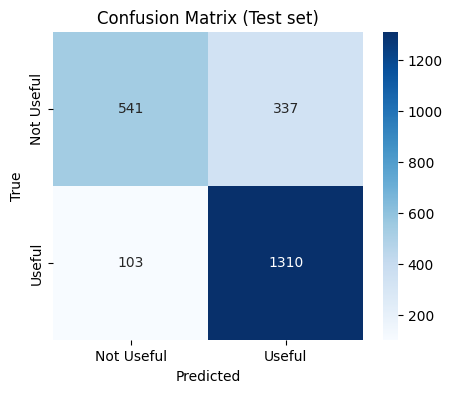

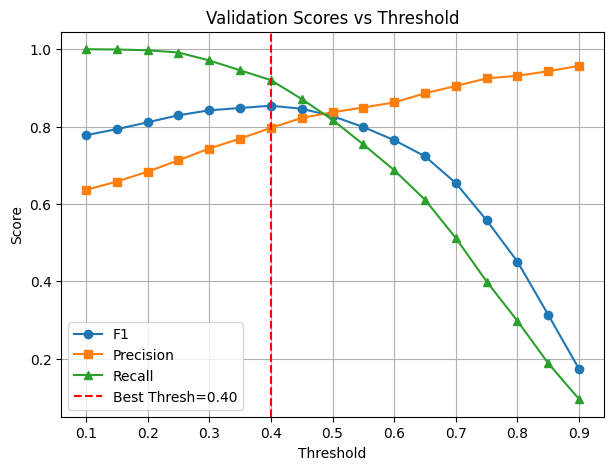

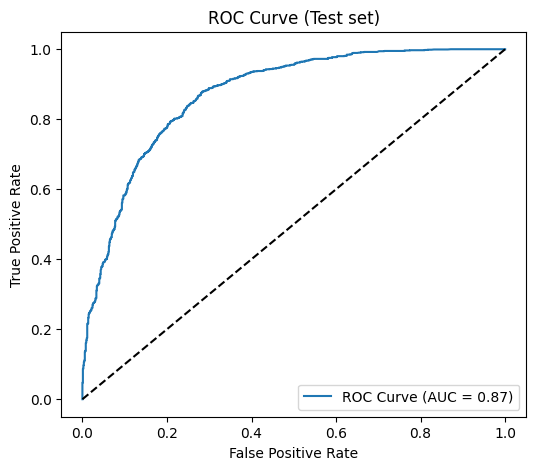

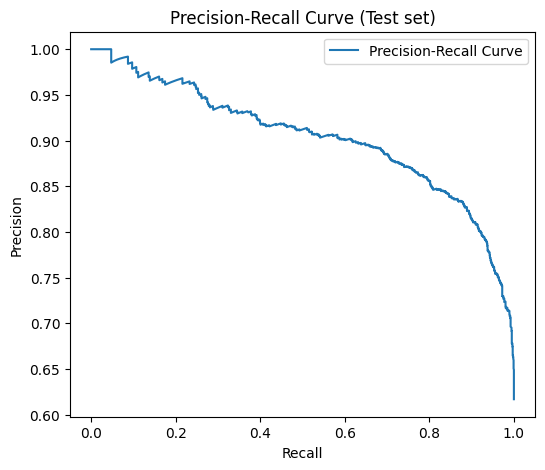

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, f1_score, precision_score,
    recall_score, roc_curve, auc, precision_recall_curve
)

# ===============================
# Load dataset
# ===============================
df = pd.read_csv("Code_Comment_Seed_Data.csv")
df["text"] = df["Comments"].astype(str) + " " + df["Surrounding Code Context"].astype(str)
# Features and labels
X = df_sample["text"]
y = df_sample["Class"]
print("Class distribution:\n", df_sample["Class"].value_counts())

# Balance dataset by downsampling Useful to match Not Useful count
count_not_useful = df_sample[df_sample["Class"] == "Not Useful"].shape[0]
df_balanced = pd.concat([
    df_sample[df_sample["Class"] == "Not Useful"],
    df_sample[df_sample["Class"] == "Useful"].sample(n=count_not_useful, random_state=42)
])

print("Balanced class distribution:\n", df_balanced["Class"].value_counts())

# Features and labels after balancing
X = df_balanced["text"]
y = df_balanced["Class"]

# Train/Val/Test Split (60/20/20)
train_df, test_df = train_test_split(df, test_size=0.20, stratify=df["Class"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, stratify=train_df["Class"], random_state=42)

print(f"Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")

# ===============================
# Features
# ===============================
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train = vectorizer.fit_transform(train_df["text"])
X_val = vectorizer.transform(val_df["text"])
X_test = vectorizer.transform(test_df["text"])

y_train, y_val, y_test = train_df["Class"], val_df["Class"], test_df["Class"]

# ===============================
# Logistic Regression with CV
# ===============================
logreg = LogisticRegression(max_iter=500, class_weight="balanced", solver="liblinear")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=cv, scoring="f1_macro")

print("Cross-validation Macro F1 scores:", cv_scores)
print("Mean CV Macro F1:", np.mean(cv_scores))

# ===============================
# Fit and Threshold tuning
# ===============================
logreg.fit(X_train, y_train)
val_probs = logreg.predict_proba(X_val)[:, 1]   # Prob of "Useful"

best_f1, best_thresh = 0, 0.5
thresholds = np.linspace(0.1, 0.9, 17)  # test many thresholds
val_results = []

for thresh in thresholds:
    val_preds = np.where(val_probs >= thresh, "Useful", "Not Useful")
    f1 = f1_score(y_val, val_preds, pos_label="Useful")
    prec = precision_score(y_val, val_preds, pos_label="Useful")
    rec = recall_score(y_val, val_preds, pos_label="Useful")
    val_results.append((thresh, f1, prec, rec))
    if f1 > best_f1:
        best_f1, best_thresh = f1, thresh

print(f"Best threshold from validation = {best_thresh:.2f} (Macro F1 = {best_f1:.3f})")

# ===============================
# Test set evaluation at BEST threshold
# ===============================
test_probs = logreg.predict_proba(X_test)[:, 1]
test_preds = np.where(test_probs >= best_thresh, "Useful", "Not Useful")

print("\n--- Final Test Evaluation ---")
print(classification_report(y_test, test_preds))
cm = confusion_matrix(y_test, test_preds)

# ===============================
# PLOTS
# ===============================

# 1. Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix (Test set)")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

# 2. F1/Precision/Recall vs Threshold
val_results = pd.DataFrame(val_results, columns=["Threshold","F1","Precision","Recall"])
plt.figure(figsize=(7,5))
plt.plot(val_results["Threshold"], val_results["F1"], marker="o", label="F1")
plt.plot(val_results["Threshold"], val_results["Precision"], marker="s", label="Precision")
plt.plot(val_results["Threshold"], val_results["Recall"], marker="^", label="Recall")
plt.axvline(best_thresh, color="red", linestyle="--", label=f"Best Thresh={best_thresh:.2f}")
plt.title("Validation Scores vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test.map({"Not Useful":0,"Useful":1}), test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test set)")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precisions, recalls, _ = precision_recall_curve(y_test.map({"Not Useful":0,"Useful":1}), test_probs)

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Test set)")
plt.legend()
plt.show()


>>BALANCED AND IMBALANNCE COMPARISON

Original class distribution:
 Class
Useful        7063
Not Useful    4389
Name: count, dtype: int64
Train=6870, Val=2291, Test=2291
Cross-validation Macro F1 scores: [0.80461489 0.76431204 0.76999229 0.77521566 0.7606502 ]
Mean CV Macro F1: 0.774957015097753
Best threshold from validation = 0.40 (F1 = 0.854)

--- Final Test Evaluation (Imbalanced Test Set) ---
              precision    recall  f1-score   support

  Not Useful       0.84      0.62      0.71       878
      Useful       0.80      0.93      0.86      1413

    accuracy                           0.81      2291
   macro avg       0.82      0.77      0.78      2291
weighted avg       0.81      0.81      0.80      2291


--- Final Test Evaluation (Balanced Test Set) ---
              precision    recall  f1-score   support

  Not Useful       0.89      0.62      0.73       878
      Useful       0.71      0.93      0.80       878

    accuracy                           0.77      1756
   macro avg       0.80      0.77      0.

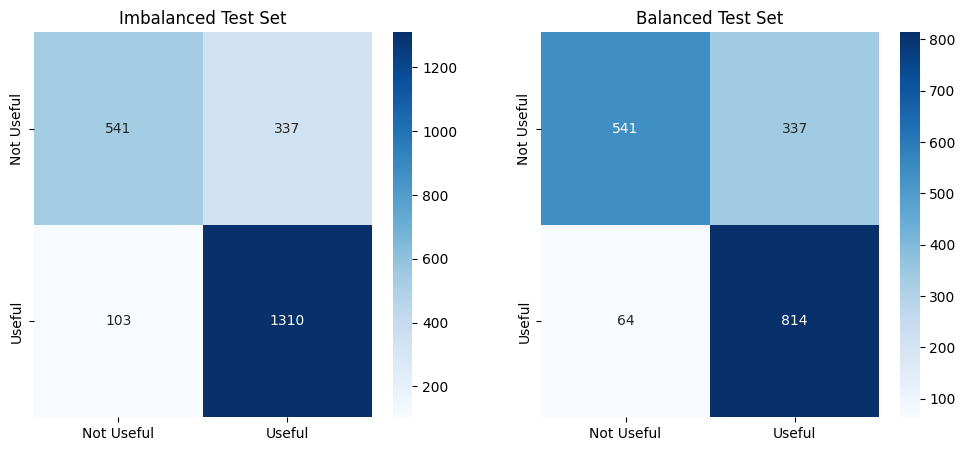

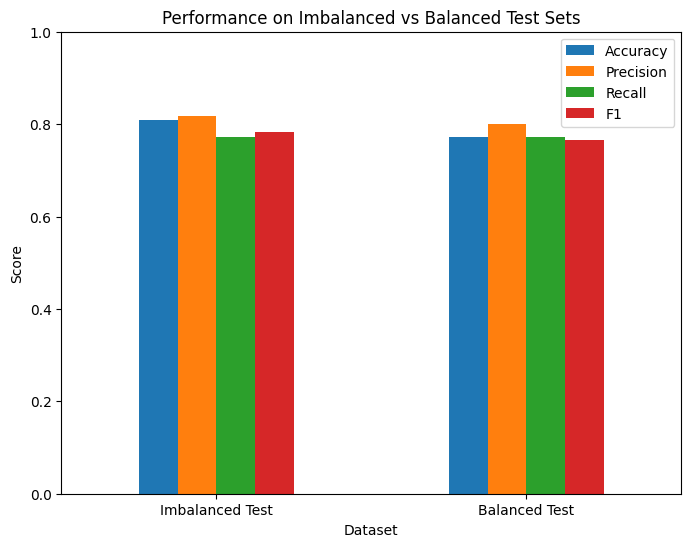

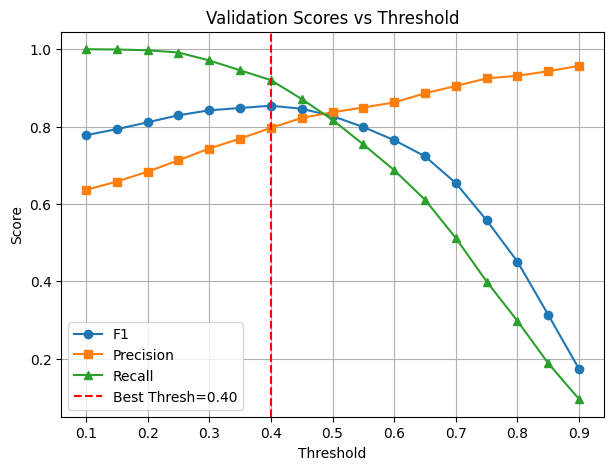

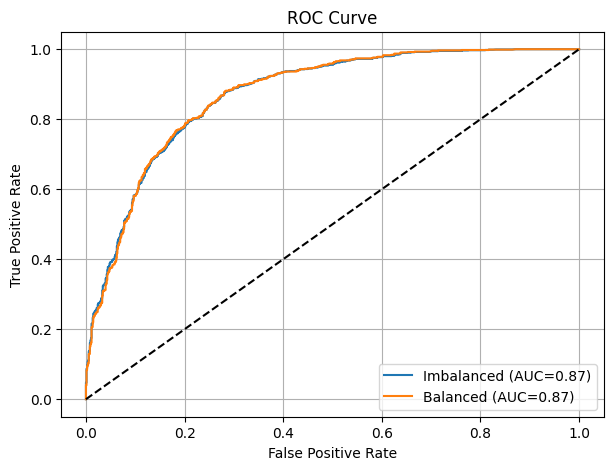

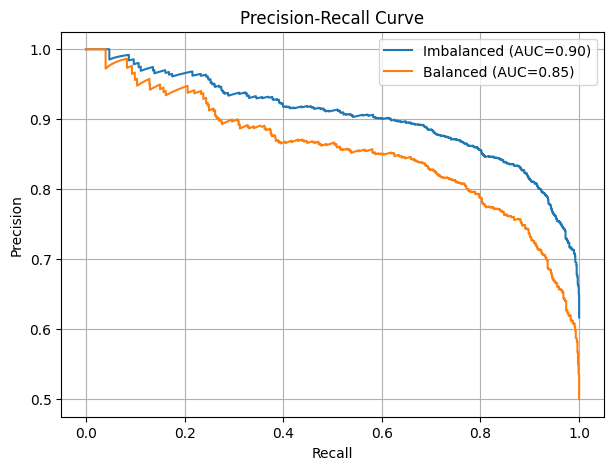

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, f1_score, precision_score,
    recall_score, accuracy_score, precision_recall_fscore_support , roc_curve, auc, precision_recall_curve
)

# ===============================
# Load dataset
# ===============================
df = pd.read_csv("Code_Comment_Seed_Data.csv")
df["text"] = df["Comments"].astype(str) + " " + df["Surrounding Code Context"].astype(str)

print("Original class distribution:\n", df["Class"].value_counts())

# ===============================
# Train/Val/Test Split
# ===============================
train_df, test_df = train_test_split(df, test_size=0.20, stratify=df["Class"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, stratify=train_df["Class"], random_state=42)

print(f"Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")

# ===============================
# Features
# ===============================
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train = vectorizer.fit_transform(train_df["text"])
X_val = vectorizer.transform(val_df["text"])
X_test = vectorizer.transform(test_df["text"])

y_train, y_val, y_test = train_df["Class"], val_df["Class"], test_df["Class"]

# ===============================
# Logistic Regression + CV
# ===============================
logreg = LogisticRegression(max_iter=500, class_weight="balanced", solver="liblinear")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=cv, scoring="f1_macro")

print("Cross-validation Macro F1 scores:", cv_scores)
print("Mean CV Macro F1:", np.mean(cv_scores))

# ===============================
# Fit and Threshold tuning
# ===============================
logreg.fit(X_train, y_train)
val_probs = logreg.predict_proba(X_val)[:, 1]   # Prob of "Useful"

best_f1, best_thresh = 0, 0.5
thresholds = np.linspace(0.1, 0.9, 17)
val_results = []

for thresh in thresholds:
    val_preds = np.where(val_probs >= thresh, "Useful", "Not Useful")
    f1 = f1_score(y_val, val_preds, pos_label="Useful")
    prec = precision_score(y_val, val_preds, pos_label="Useful")
    rec = recall_score(y_val, val_preds, pos_label="Useful")
    val_results.append((thresh, f1, prec, rec))
    if f1 > best_f1:
        best_f1, best_thresh = f1, thresh

print(f"Best threshold from validation = {best_thresh:.2f} (F1 = {best_f1:.3f})")

# ===============================
# Test set evaluation (Imbalanced)
# ===============================
test_probs = logreg.predict_proba(X_test)[:, 1]
test_preds = np.where(test_probs >= best_thresh, "Useful", "Not Useful")

print("\n--- Final Test Evaluation (Imbalanced Test Set) ---")
print(classification_report(y_test, test_preds))
cm = confusion_matrix(y_test, test_preds)

# ===============================
# Balanced Test Set (undersample Useful)
# ===============================
not_useful_idx = y_test[y_test == "Not Useful"].index.to_numpy()
useful_idx = y_test[y_test == "Useful"].index.to_numpy()

np.random.seed(42)
useful_sample = np.random.choice(useful_idx, size=len(not_useful_idx), replace=False)
balanced_idx = np.concatenate([not_useful_idx, useful_sample])

# Get labels + probs for balanced subset
y_test_bal = y_test.loc[balanced_idx]
test_probs_bal = pd.Series(test_probs, index=y_test.index).loc[balanced_idx].to_numpy()
test_preds_bal = np.where(test_probs_bal >= best_thresh, "Useful", "Not Useful")

print("\n--- Final Test Evaluation (Balanced Test Set) ---")
print(classification_report(y_test_bal, test_preds_bal))
cm_bal = confusion_matrix(y_test_bal, test_preds_bal)

# ===============================
# Side-by-side metrics
# ===============================
def get_scores(y_true, y_pred, name):
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="macro")
    acc = accuracy_score(y_true, y_pred)
    return {"Dataset": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

results = []
results.append(get_scores(y_test, test_preds, "Imbalanced Test"))
results.append(get_scores(y_test_bal, test_preds_bal, "Balanced Test"))

df_results = pd.DataFrame(results)
print("\nSide-by-side metrics:\n", df_results)

# ===============================
# ROC & PR Curves
# ===============================

# --- Imbalanced ---
fpr, tpr, _ = roc_curve(y_test.map({"Not Useful":0, "Useful":1}), test_probs)
roc_auc = auc(fpr, tpr)

prec, rec, _ = precision_recall_curve(y_test.map({"Not Useful":0, "Useful":1}), test_probs)
pr_auc = auc(rec, prec)

# --- Balanced ---
fpr_bal, tpr_bal, _ = roc_curve(y_test_bal.map({"Not Useful":0, "Useful":1}), test_probs_bal)
roc_auc_bal = auc(fpr_bal, tpr_bal)

prec_bal, rec_bal, _ = precision_recall_curve(y_test_bal.map({"Not Useful":0, "Useful":1}), test_probs_bal)
pr_auc_bal = auc(rec_bal, prec_bal)

# ===============================
# PLOTS
# ===============================

# 1. Confusion Matrices side by side
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_, ax=ax[0])
ax[0].set_title("Imbalanced Test Set")
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_, ax=ax[1])
ax[1].set_title("Balanced Test Set")
plt.show()

# 2. Metrics bar chart
df_results.set_index("Dataset")[["Accuracy","Precision","Recall","F1"]].plot(
    kind="bar", figsize=(8,6), rot=0
)
plt.title("Performance on Imbalanced vs Balanced Test Sets")
plt.ylim(0,1)
plt.ylabel("Score")
plt.show()

# 3. Threshold curves (F1/Precision/Recall on Validation)
val_results = pd.DataFrame(val_results, columns=["Threshold","F1","Precision","Recall"])
plt.figure(figsize=(7,5))
plt.plot(val_results["Threshold"], val_results["F1"], marker="o", label="F1")
plt.plot(val_results["Threshold"], val_results["Precision"], marker="s", label="Precision")
plt.plot(val_results["Threshold"], val_results["Recall"], marker="^", label="Recall")
plt.axvline(best_thresh, color="red", linestyle="--", label=f"Best Thresh={best_thresh:.2f}")
plt.title("Validation Scores vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# 4. ROC Curves
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"Imbalanced (AUC={roc_auc:.2f})")
plt.plot(fpr_bal, tpr_bal, label=f"Balanced (AUC={roc_auc_bal:.2f})")
plt.plot([0,1],[0,1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# 5. Precision-Recall Curves
plt.figure(figsize=(7,5))
plt.plot(rec, prec, label=f"Imbalanced (AUC={pr_auc:.2f})")
plt.plot(rec_bal, prec_bal, label=f"Balanced (AUC={pr_auc_bal:.2f})")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()